In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

In [99]:
df = pd.read_csv("./data/creditcard.csv")

In [100]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [101]:
X = df.iloc[:,1:-1]

In [102]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [103]:
from keras.models import Sequential
from keras.layers import Dense

In [104]:
model = Sequential([
    Dense(32, input_shape=(X.shape[1],), activation='sigmoid'),
    Dense(16, activation='sigmoid'),
    Dense(X.shape[1], activation='linear')
])

In [105]:
model.compile(loss='mean_squared_error')

In [106]:
history = model.fit(X,X, epochs=20, validation_split=0.1)

Epoch 1/20
8011/8011 [==============================] - 20s 2ms/step - loss: 2173.8828 - val_loss: 1859.5624
Epoch 2/20
8011/8011 [==============================] - 21s 3ms/step - loss: 1804.6432 - val_loss: 1665.4381
Epoch 3/20
8011/8011 [==============================] - 19s 2ms/step - loss: 1576.9580 - val_loss: 1536.8386
Epoch 4/20
8011/8011 [==============================] - 12s 2ms/step - loss: 1415.3992 - val_loss: 1444.3361
Epoch 5/20
8011/8011 [==============================] - 12s 2ms/step - loss: 1292.0557 - val_loss: 1373.4406
Epoch 6/20
8011/8011 [==============================] - 20s 2ms/step - loss: 1195.7009 - val_loss: 1317.2365
Epoch 7/20
8011/8011 [==============================] - 19s 2ms/step - loss: 1116.8082 - val_loss: 1271.1273
Epoch 8/20
8011/8011 [==============================] - 20s 2ms/step - loss: 1050.4569 - val_loss: 1231.5530
Epoch 9/20
8011/8011 [==============================] - 19s 2ms/step - loss: 994.9772 - val_loss: 1197.7916
Epoch 10/20
8011/801

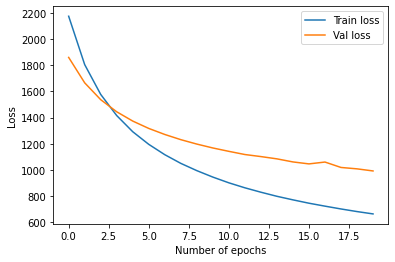

In [107]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.legend(loc='best')

In [108]:
X_ = model.predict(X)

In [109]:
X_.shape

(284807, 29)

In [110]:
X.shape

(284807, 29)

In [111]:
X_[0]

array([-1.05788577e+00, -9.23240781e-02,  1.34648812e+00,  5.09654403e-01,
       -1.60555512e-01,  2.38534331e-01,  3.12879026e-01, -1.43017536e-02,
        1.09630935e-01, -5.52569330e-01, -2.76288167e-02,  3.19614828e-01,
       -1.90241113e-01,  7.27113336e-02,  7.93356970e-02, -3.52579921e-01,
       -8.22937563e-02,  2.48678952e-01, -2.99238786e-02,  4.76415791e-02,
        5.23753688e-02,  1.09162159e-01,  2.46767253e-02, -3.96351218e-02,
        4.91466038e-02,  1.43450245e-01,  2.09048484e-03,  3.55517911e-03,
        1.46856979e+02], dtype=float32)

In [112]:
X.values[0]

array([-1.35980713e+00, -7.27811733e-02,  2.53634674e+00,  1.37815522e+00,
       -3.38320770e-01,  4.62387778e-01,  2.39598554e-01,  9.86979013e-02,
        3.63786970e-01,  9.07941720e-02, -5.51599533e-01, -6.17800856e-01,
       -9.91389847e-01, -3.11169354e-01,  1.46817697e+00, -4.70400525e-01,
        2.07971242e-01,  2.57905802e-02,  4.03992960e-01,  2.51412098e-01,
       -1.83067779e-02,  2.77837576e-01, -1.10473910e-01,  6.69280749e-02,
        1.28539358e-01, -1.89114844e-01,  1.33558377e-01, -2.10530535e-02,
        1.49620000e+02])

In [113]:
error = np.mean((X-X_)**2, axis=1) # Reconstruction error of each activity profile

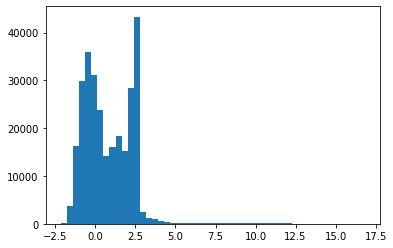

In [114]:
plt.hist(np.log(error), bins=50);

In [115]:
thr = np.percentile(np.log(error), 98)

In [116]:
y_pred = [1 if err >= thr else 0 for err in np.log(error)]

In [117]:
from sklearn.metrics import confusion_matrix
confusion_matrix(df['Class'], y_pred)

array([[278814,   5501],
       [   296,    196]], dtype=int64)

In [118]:
np.mean(df['Class'])

0.001727485630620034